<a href="https://colab.research.google.com/github/laura-vgm/competencia-kaggle-AI-UdeA/blob/main/04%20-%20modelo%20con%20preprocesado%20y%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Laura Valentina Garcia Mosquera

Cédula: 1017275354

Programa: Bioingeniería


# Descarga de los datos desde Kaggle

In [1]:
# descarga desde Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 50% 10.0M/20.1M [00:00<00:00, 101MB/s]
100% 20.1M/20.1M [00:00<00:00, 133MB/s]


# Descomprimir el archivo

In [2]:
!unzip udea-ai4eng-20242.zip   # se descomprime el archivo

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


# Carga del archivo train.csv



In [3]:
import pandas as pd   # librería para el manejo de la base de datos y para cargar el archivo

data_train = pd.read_csv("train.csv")  # se carga con una función (read_csv) que lee archivos .csv de la librería pandas
print ("tamaño de la base de datos cargada", data_train.shape)
print (str(data_train.shape[0]) + " filas y " + str(data_train.shape[1]) + " columnas")

tamaño de la base de datos cargada (692500, 12)
692500 filas y 12 columnas


In [4]:
data_train.head()  # se muestran las primeras filas de la base de datos

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# Exploración de los datos

In [5]:
data_train.columns   # columnas de la base de datos de train

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [6]:
# Cantidad de estudiantes por periodo
print("Hay " + str(data_train.ESTU_PRGM_ACADEMICO.unique().shape[0]) + " programas académicos diferentes en la base de datos")

Hay 948 programas académicos diferentes en la base de datos


In [7]:
# Cantidad de estudiantes por periodo
data_train.PERIODO.value_counts()

,count
PERIODO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


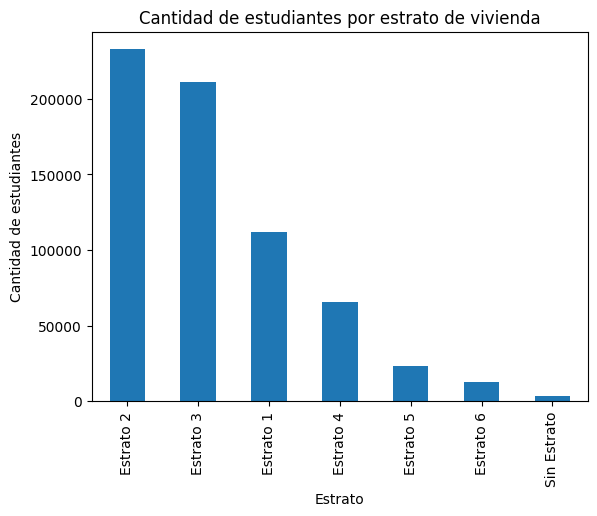

In [8]:
import matplotlib.pyplot as plt

# Número de estudiantes por cada estrato de vivienda
ax = data_train.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')
ax.set_title('Cantidad de estudiantes por estrato de vivienda')
ax.set_xlabel('Estrato')
ax.set_ylabel('Cantidad de estudiantes')
plt.show()

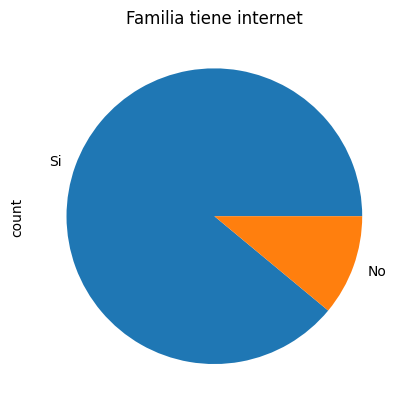

In [9]:
# Número de estudiantes que familia tiene o no internet
ax = data_train.FAMI_TIENEINTERNET.value_counts().plot(kind='pie')
ax.set_title('Familia tiene internet')
plt.show()

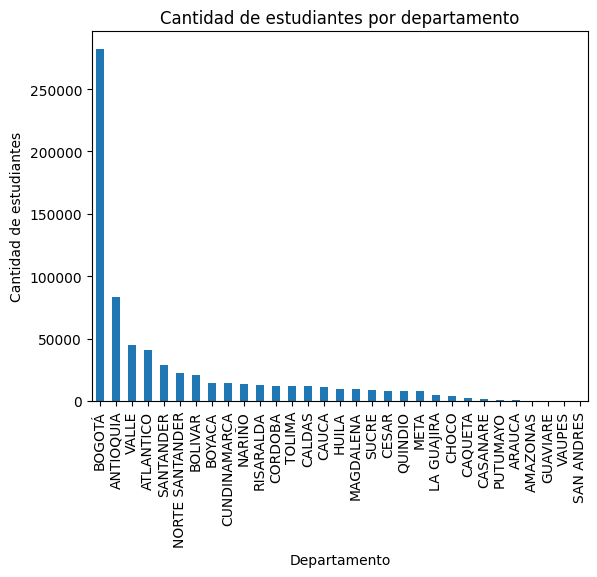

In [10]:
# Número de estudiantes por departamento en donde estudia el programa
ax = data_train.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')
ax.set_title('Cantidad de estudiantes por departamento')
ax.set_xlabel('Departamento')
ax.set_ylabel('Cantidad de estudiantes')
plt.show()

In [11]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=b17a4236ddddb4d682318444dba3723113e1ee065f1418b47671c0e85115fd5b
  Stored in directory: /root/.cache/pip/wheels/9a/45/da/49bdb0e82cc7a605e9c05dc24265687c5f349b53dcb74728e2
Successfully built rlxutils


Número de estudiantes por valor matricula universidad y cuál es su rendimiento global


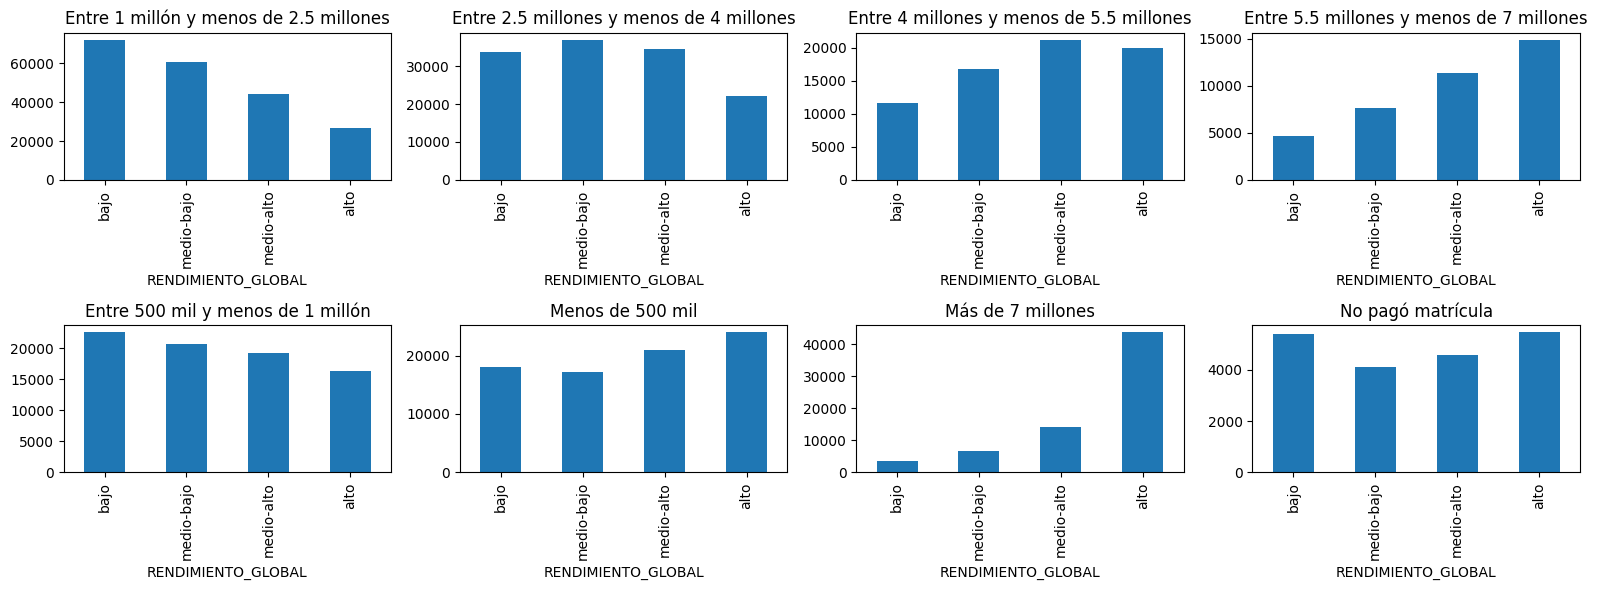

In [12]:
from rlxutils import subplots
import matplotlib.pyplot as plt

# Número de estudiantes por valor matricula universidad y cuál es su rendimiento global
c = sorted(data_train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data_train[data_train.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

print("Número de estudiantes por valor matricula universidad y cuál es su rendimiento global")

Número de estudiantes por cuántas horas a la semana trabaja y cuál es su rendimiento global


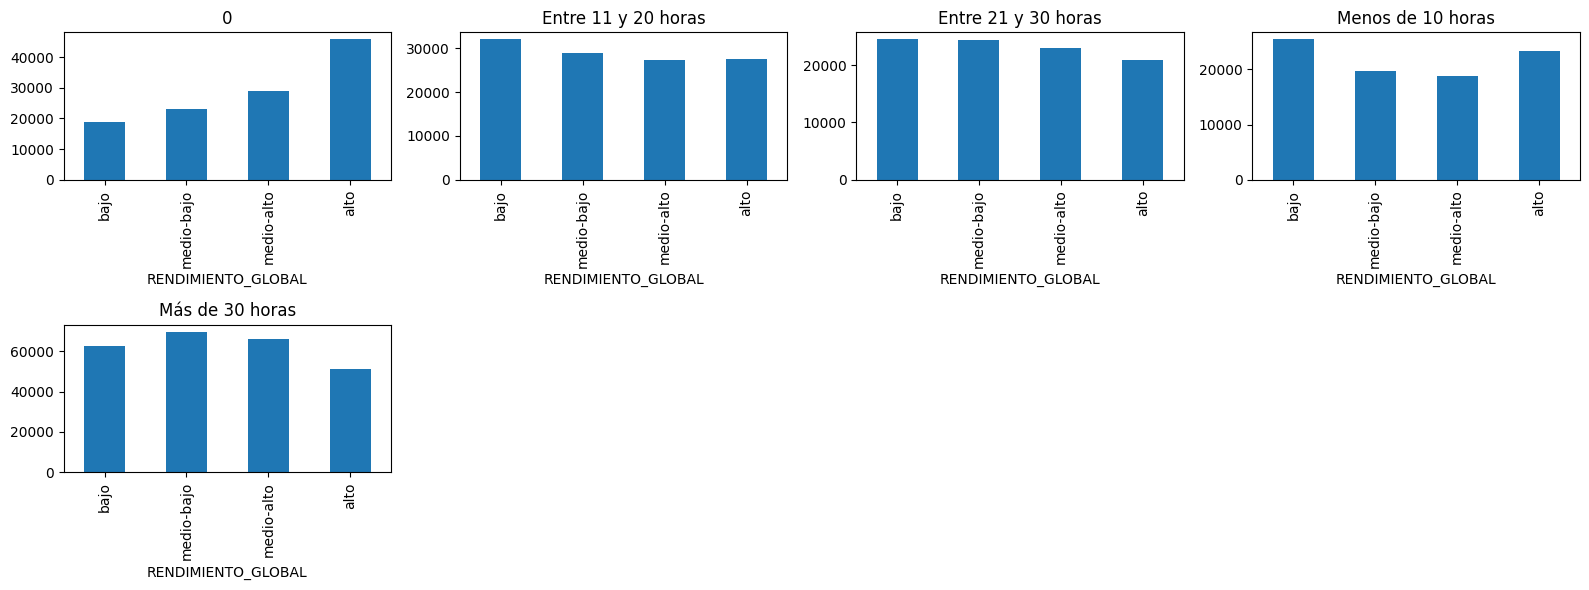

In [13]:
# Número de estudiantes por cuántas horas a la semana trabaja y cuál es su rendimiento global
c = sorted(data_train.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data_train[data_train.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

print("Número de estudiantes por cuántas horas a la semana trabaja y cuál es su rendimiento global")

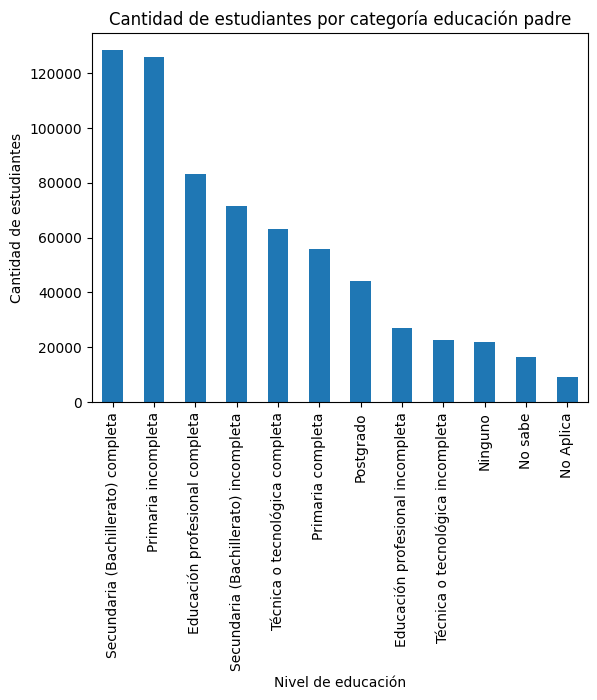

In [14]:
# Número de estudiantes por educación del padre
ax = data_train.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')
ax.set_title('Cantidad de estudiantes por categoría educación padre')
ax.set_xlabel('Nivel de educación')
ax.set_ylabel('Cantidad de estudiantes')
plt.show()

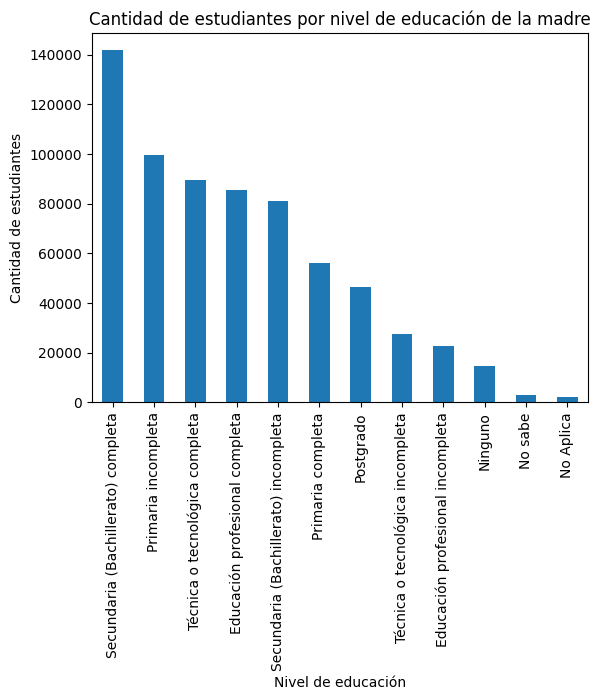

In [15]:
# Número de estudiantes por nivel de educación madre
ax = data_train.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar')
ax.set_title('Cantidad de estudiantes por nivel de educación de la madre')
ax.set_xlabel('Nivel de educación')
ax.set_ylabel('Cantidad de estudiantes')
plt.show()

Número de estudiantes que pago matricula propio y cuál es su rendimiento globall


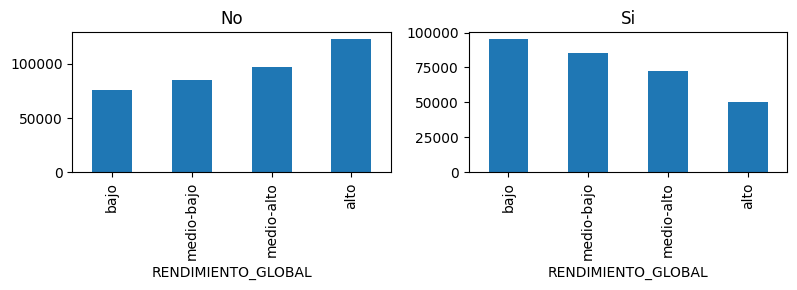

In [16]:
# Número de estudiantes que pago matricula propio y cuál es su rendimiento global
c = sorted(data_train.ESTU_PAGOMATRICULAPROPIO.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = data_train[data_train.ESTU_PAGOMATRICULAPROPIO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

print("Número de estudiantes que pago matricula propio y cuál es su rendimiento globall")

# Operaciones de limpieza y preprocesado

### En primer lugar, miro que tipo de dato tiene cada columna

In [17]:
data_train.dtypes # tipo de dato de cada columna

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,object
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_HORASSEMANATRABAJA,object
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_EDUCACIONMADRE,object


### Convierto la etiqueta que corresponde al rendimiento global a una variable numérica

In [18]:
data_train['RENDIMIENTO_GLOBAL'].unique() # me muestra los valores únicos de la columna 'RENDIMIENTO_GLOBAL'

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [19]:
data_train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


### Identificación de valores faltantes:

In [20]:
print(data_train.isnull().sum())  # miro cuales columnas tienen valores faltantes

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


### Imputación de datos:

In [21]:
data_train.fillna(data_train.mode().iloc[0], inplace=True)   # al ser variables categóricas le imputo valores con la moda

In [22]:
print(data_train.isnull().sum())

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64


### One-Hot Encoding usando Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Las columnas categóricas son:
categorical_columns = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
                       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
                       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
                       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
                       'ESTU_PAGOMATRICULAPROPIO']

# A continuación aplico Label Encoding a cada columna categórica
for column in categorical_columns:
    data_train[column] = label_encoder.fit_transform(data_train[column])

print(data_train.head())

       ID  PERIODO  ESTU_PRGM_ACADEMICO  ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  300                       4   
1  645256    20212                  249                       3   
2  308367    20203                  819                       4   
3  470353    20195                   14                      26   
4  989032    20212                  907                       1   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                               3                        3   
1                               1                        0   
2                               1                        4   
3                               2                        0   
4                               1                        2   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                     2                   1                   11   
1                     2                   0                   10   
2                   

In [24]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
data_train[y_col] = [rmap[i] for i in data_train[y_col]]
data_train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,300,4,3,3,2,1,11,5,0,2
1,645256,20212,249,3,1,0,2,0,10,11,0,0
2,308367,20203,819,4,1,4,2,1,8,8,0,0
3,470353,20195,14,26,2,0,3,1,4,8,0,3
4,989032,20212,907,1,1,2,2,1,6,6,0,1


In [50]:
z = data_train

### Definir `X` y `y` para entrenar el modelo


In [51]:
z = z[sorted(z.columns)]

X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape

((692500, 11), (692500,))

### split de train y test

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 11), (138500, 11), (554000,), (138500,))

## Modelo de clasificación Random Forest

modelo de train

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

rf_model.fit(Xtr, ytr)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

se obtienen las predicciones

In [56]:
preds_tr = rf_model.predict(Xtr)
preds_ts = rf_model.predict(Xts)

In [57]:
print (preds_tr[:10])
print (preds_ts[:10])

[0 3 3 0 1 3 1 2 0 0]
[2 2 1 0 3 0 2 1 0 2]


get accuracy and confusion matrices

In [58]:
import numpy as np
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.41549458483754514, 0.4046570397111913)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

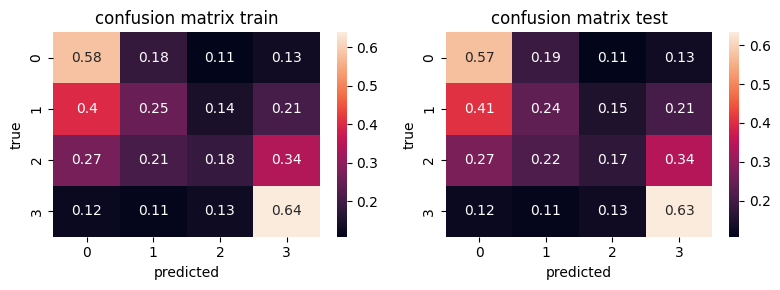

In [61]:
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

### Ahora se aplica al grupo de test

In [62]:
zt = pd.read_csv("test.csv",index_col=False)
zt

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [63]:
zt.columns

Index(['Unnamed: 0', 'ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'ESTU_PAGOMATRICULAPROPIO'],
      dtype='object')

In [64]:
zt=zt[['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'ESTU_PAGOMATRICULAPROPIO']]

In [66]:
label_encoder = LabelEncoder()

# Las columnas categóricas son:
categorical_columns = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
                       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
                       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
                       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
                       'ESTU_PAGOMATRICULAPROPIO']

# A continuación aplico Label Encoding a cada columna categórica
for column in categorical_columns:
    zt[column] = label_encoder.fit_transform(zt[column])

print(zt.head())

<ipython-input-66-73b0ea696a8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt[column] = label_encoder.fit_transform(zt[column])
<ipython-input-66-73b0ea696a8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt[column] = label_encoder.fit_transform(zt[column])
<ipython-input-66-73b0ea696a8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

       ID  PERIODO  ESTU_PRGM_ACADEMICO  ESTU_PRGM_DEPARTAMENTO  \
0  550236    20183                  914                       5   
1   98545    20203                   13                       1   
2  499179    20212                  449                       4   
3  782980    20195                  228                      27   
4  785185    20212                   14                       3   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                               5                        3   
1                               1                        2   
2                               0                        0   
3                               0                        2   
4                               1                        1   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  FAMI_EDUCACIONPADRE  \
0                     2                   1                   10   
1                     1                   1                    8   
2                   

<ipython-input-66-73b0ea696a8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt[column] = label_encoder.fit_transform(zt[column])
<ipython-input-66-73b0ea696a8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zt[column] = label_encoder.fit_transform(zt[column])
<ipython-input-66-73b0ea696a8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Predicción

In [67]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 11)

In [92]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(classification_report(yts, preds_ts))

              precision    recall  f1-score   support

           0       0.42      0.57      0.48     34677
           1       0.32      0.24      0.27     34472
           2       0.31      0.17      0.22     34487
           3       0.49      0.63      0.55     34864

    accuracy                           0.40    138500
   macro avg       0.38      0.40      0.38    138500
weighted avg       0.38      0.40      0.38    138500



### Se mapean las predicciones a valores textuales

In [69]:

rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [70]:
zt_ids = zt['ID'].values

In [71]:

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-bajo
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,alto
296783,239074,alto
296784,963852,alto


In [72]:
# se guarda en el archivo a enviar
submission.to_csv("my_submission.csv", index=False)

In [73]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-bajo
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [74]:
submission.shape

(296786, 2)